> Reference: https://www.geeksforgeeks.org/stock-price-prediction-using-machine-learning-in-python/

In [37]:
%pip install pandas -q
%pip install numpy -q
%pip install seaborn  -q
%pip install matplotlib -q
%pip install yfinance -q
%pip install scikit-learn -q


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgr

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

# Load dataset of bank stock price

In [23]:
ticker = "ITUB4.SA"
data = yf.download(ticker, start="2008-01-01", progress=False)

In [24]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,15.100806,15.223335,14.306027,14.411997,8.390956,6442543
2008-01-03,14.372258,14.736532,14.117267,14.140448,8.232851,7212266
2008-01-04,14.315962,14.431867,13.799355,14.239795,8.290695,7374122
2008-01-07,14.292780,14.570953,14.007985,14.239795,8.290695,7597580
2008-01-08,14.534526,14.703416,14.256353,14.372258,8.367826,5372057


# Data analysis

### Visualize dataset info

In [25]:
data.shape

(3875, 6)

In [26]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3.875000e+03
mean,21.515957,21.797701,21.220961,21.511065,16.728894,2.267181e+07
std,7.123247,7.186731,7.053614,7.116164,7.934243,1.393961e+07
min,7.244082,7.653890,6.999853,7.244082,4.217656,0.000000e+00
25%,15.765357,15.965895,15.577260,15.774407,9.843244,1.333051e+07
50%,19.382919,19.680441,19.142590,19.421488,13.554216,1.949632e+07
75%,26.905000,27.286667,26.580000,26.905000,24.137592,2.863745e+07
max,38.669998,39.790001,38.400002,39.689999,33.508633,1.606699e+08


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3875 entries, 2008-01-02 to 2023-08-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3875 non-null   float64
 1   High       3875 non-null   float64
 2   Low        3875 non-null   float64
 3   Close      3875 non-null   float64
 4   Adj Close  3875 non-null   float64
 5   Volume     3875 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 211.9 KB


# Exploratory Data Analysis

Now let's look at how quarterly results can affect stock prices over time.

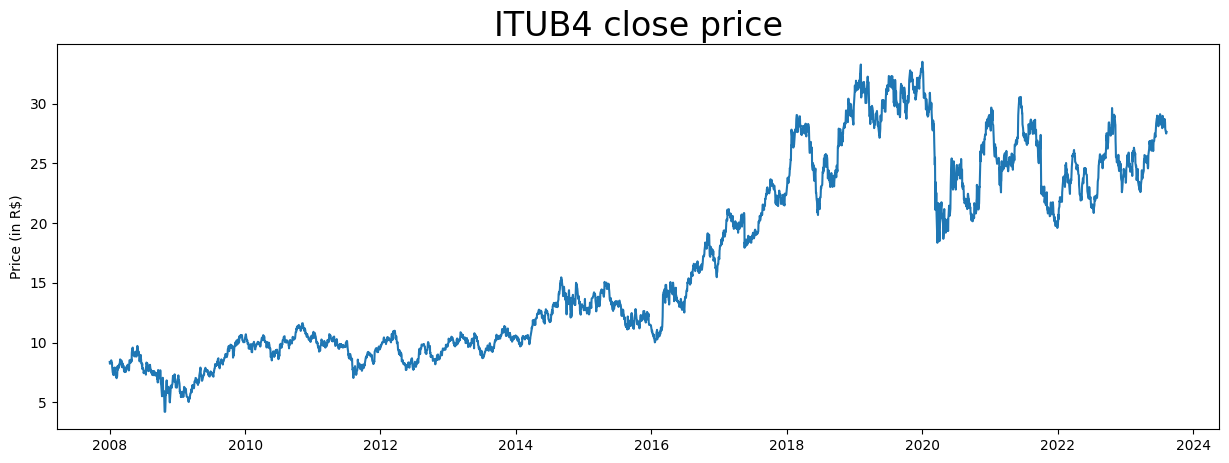

In [28]:
plt.figure(figsize=(15, 5))
plt.plot(data["Adj Close"])
plt.title("ITUB4 close price", fontsize=24)
plt.ylabel("Price (in R$)")
plt.show()

Let"s check if the "Close" and "Adj Close" have the same values, so that we can remove possibly redundant data.

In [31]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,15.100806,15.223335,14.306027,14.411997,8.390956,6442543
2008-01-03,14.372258,14.736532,14.117267,14.140448,8.232851,7212266
2008-01-04,14.315962,14.431867,13.799355,14.239795,8.290695,7374122
2008-01-07,14.292780,14.570953,14.007985,14.239795,8.290695,7597580
2008-01-08,14.534526,14.703416,14.256353,14.372258,8.367826,5372057
...,...,...,...,...,...,...
2023-08-04,28.330000,28.540001,27.700001,27.879999,27.879999,44208100
2023-08-07,27.930000,28.280001,27.620001,27.660000,27.660000,33001900
2023-08-08,27.360001,28.010000,27.110001,27.600000,27.600000,44517500


In [32]:
data[data["Close"] == data["Adj Close"]].shape

(8, 6)

As we can notice, only 8 rows the "Close" and "Adj Close" have the same value, so we can't remove it.

Before moving on, let's check the dataset for null values.

In [33]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

/tmp/ipykernel_218356/980192968.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i+1)


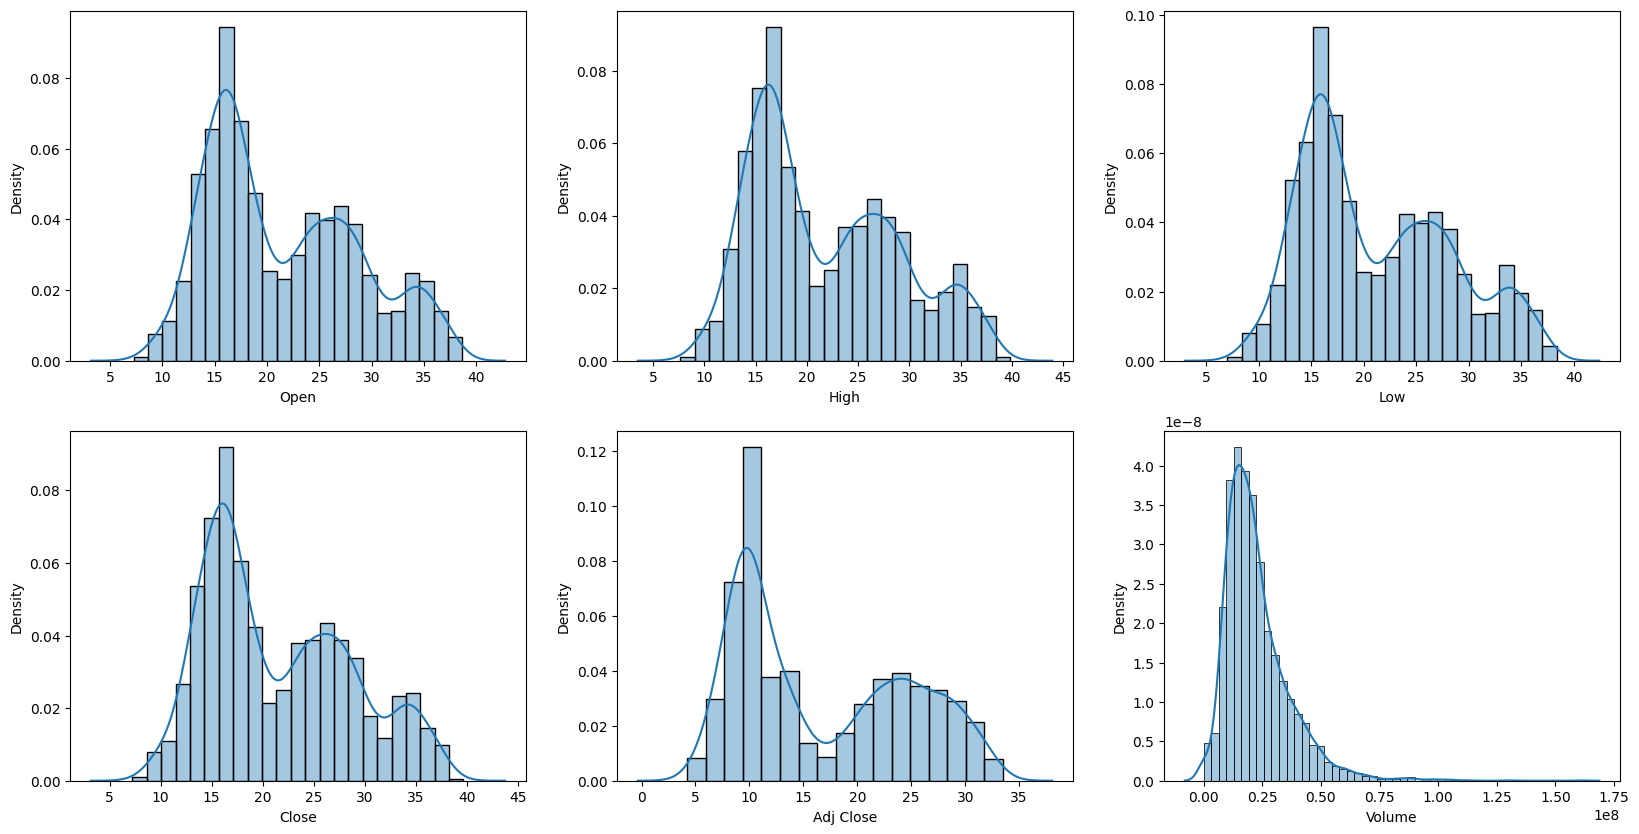

In [46]:

features = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]

plt.subplots(figsize=(20, 10))

for i, column in enumerate(features):
    plt.subplot(2, 3, i+1)

    # https://stackoverflow.com/questions/67638590/emulating-deprecated-seaborn-distplots
    _, FD_bins = np.histogram(data[column], bins="fd")
    bin_nr = min(len(FD_bins)-1, 50)
    sns.histplot(data=data, x=column, bins=bin_nr,
                 stat="density", alpha=0.4, kde=True, kde_kws={"cut": 3})

plt.show()

After that, let's create the box plot to identify outliers.

/tmp/ipykernel_218356/2157267840.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


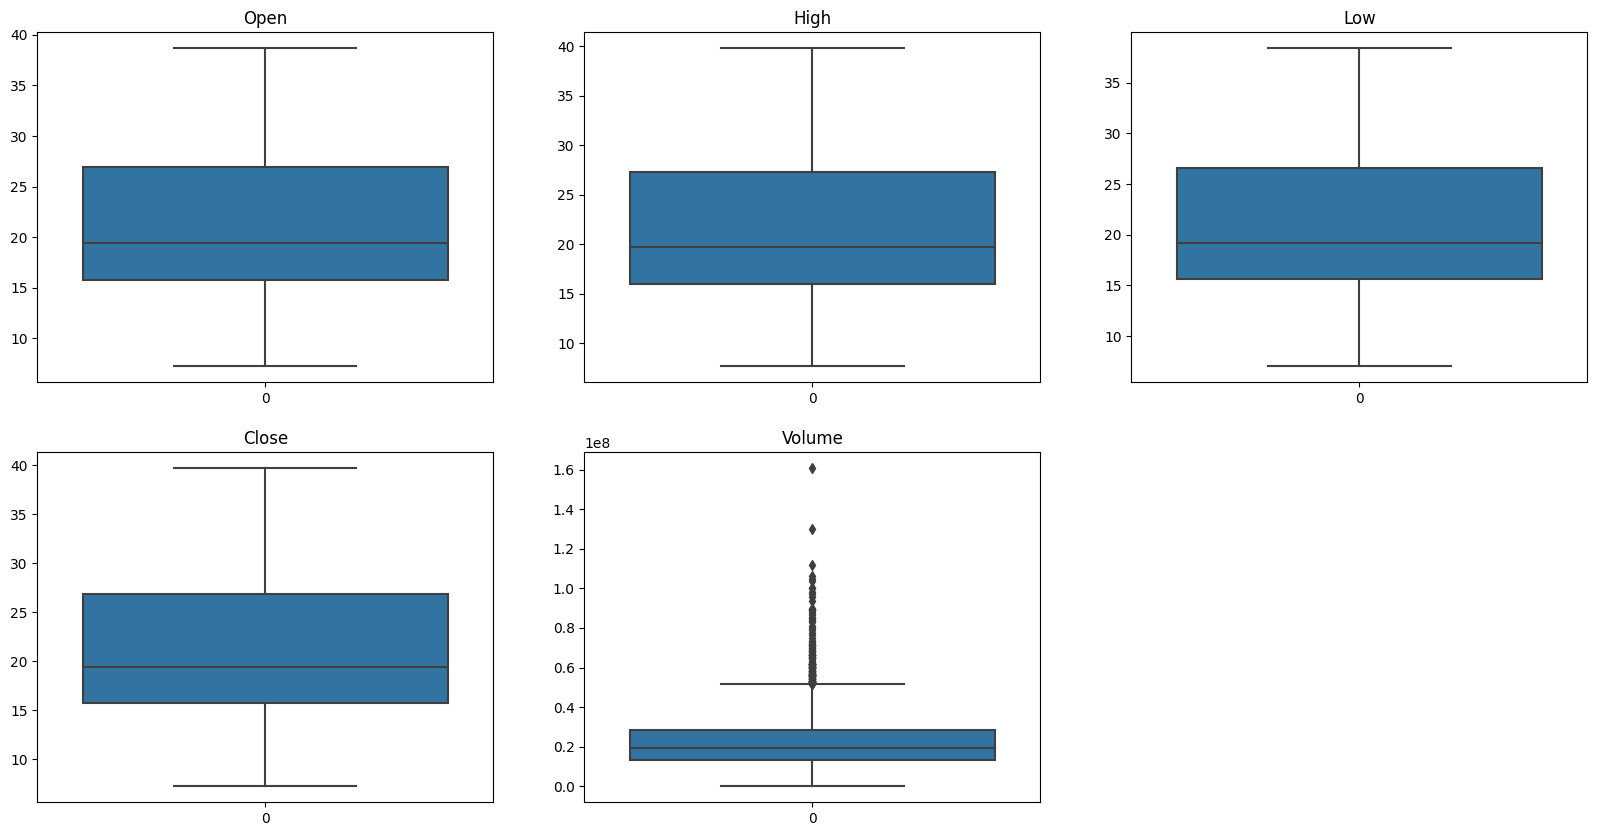

In [57]:
plt.subplots(figsize=(20,10))

for i, column in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(data[column]).set_title(column)

plt.show()

We can conclude that only in the volume column have outliers.

# Feature Engineering